**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

**Connecting dataset**

In [2]:
!gdown "https://drive.google.com/uc?id=17O_cLrK9HrR43yz1CdT8ZKA6_ILN206N"

Downloading...
From: https://drive.google.com/uc?id=17O_cLrK9HrR43yz1CdT8ZKA6_ILN206N
To: /content/Strooptest.csv
100% 458/458 [00:00<00:00, 1.36MB/s]


In [3]:
df = pd.read_csv('Strooptest.csv')
print(df.head())

   Sample ID  Score (/100)  Accuracy (%)  Avg. Reaction (s) Correct Answers
0          1            99          98.5               1.32         135/137
1          2            99          99.3               1.25         136/137
2          3            97          97.8               1.40         134/137
3          4           100         100.0               1.30         137/137
4          5            96          97.1               1.45         133/137


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sample ID          16 non-null     int64  
 1   Score (/100)       16 non-null     int64  
 2   Accuracy (%)       16 non-null     float64
 3   Avg. Reaction (s)  16 non-null     float64
 4   Correct Answers    16 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 772.0+ bytes
None


**Feature Selection**

In [5]:
features_df = df[['Score (/100)', 'Accuracy (%)', 'Avg. Reaction (s)']]
X_unscaled = features_df.to_numpy() # Convert to numpy array


In [6]:
scaler_nn = StandardScaler()
X_scaled_nn = scaler_nn.fit_transform(features_df)


**Manual Labeling Function**

In [7]:
def manual_label(row):
    score = row['Score (/100)']
    reaction_time = row['Avg. Reaction (s)']
    # High performance: high score AND fast reaction
    if score >= 99 and reaction_time < 1.3:
        return 2  # 'High Performance'
    # Low performance: low score OR slow reaction
    elif score <= 97 or reaction_time > 1.4:
        return 0  # 'Low Performance'
    # Everything else is average
    else:
        return 1  # 'Average Performance'

In [19]:
print("--- DataFrame Information ---")
print(df.info())
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sample ID             16 non-null     int64  
 1   Score (/100)          16 non-null     int64  
 2   Accuracy (%)          16 non-null     float64
 3   Avg. Reaction (s)     16 non-null     float64
 4   Correct Answers       16 non-null     object 
 5   Performance_Category  16 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 900.0+ bytes
None

--- Descriptive Statistics ---
       Sample ID  Score (/100)  Accuracy (%)  Avg. Reaction (s)  \
count  16.000000     16.000000     16.000000          16.000000   
mean    8.500000     98.250000     98.675000           1.335000   
std     4.760952      1.183216      0.861394           0.061536   
min     1.000000     96.000000     97.100000           1.250000   
25%     4.750000     

In [8]:
df['Performance_Category'] = df.apply(manual_label, axis=1)
y = df['Performance_Category']
print("Distribution of manually created labels:")
print(y.value_counts())
print("\nDataFrame with Manual Labels:")
print(df.head())

Distribution of manually created labels:
Performance_Category
1    6
2    5
0    5
Name: count, dtype: int64

DataFrame with Manual Labels:
   Sample ID  Score (/100)  Accuracy (%)  Avg. Reaction (s) Correct Answers  \
0          1            99          98.5               1.32         135/137   
1          2            99          99.3               1.25         136/137   
2          3            97          97.8               1.40         134/137   
3          4           100         100.0               1.30         137/137   
4          5            96          97.1               1.45         133/137   

   Performance_Category  
0                     1  
1                     2  
2                     0  
3                     1  
4                     0  


In [9]:
X_features = df[['Score (/100)', 'Accuracy (%)', 'Avg. Reaction (s)']]
y_target = df['Performance_Category']

In [10]:
print("Manual Labeling Results")
print(df[['Score (/100)', 'Avg. Reaction (s)', 'Performance_Category']].head())
print("\nDistribution of new labels:")
print(y_target.value_counts())
print("\n")

Manual Labeling Results
   Score (/100)  Avg. Reaction (s)  Performance_Category
0            99               1.32                     1
1            99               1.25                     2
2            97               1.40                     0
3           100               1.30                     1
4            96               1.45                     0

Distribution of new labels:
Performance_Category
1    6
2    5
0    5
Name: count, dtype: int64




Data Splitting 70% training and 30% testing

In [11]:
X_unscaled = X_features.to_numpy()
X_train_tree, X_test_tree, y_train, y_test = train_test_split(
    X_unscaled, y_target, test_size=0.3, random_state=42, stratify=y_target
)

In [12]:
scaler_nn = StandardScaler()
X_scaled_nn = scaler_nn.fit_transform(X_features)
X_train_nn, X_test_nn, _, _ = train_test_split(
    X_scaled_nn, y_target, test_size=0.3, random_state=42, stratify=y_target
)

Neural Network (MLP)

In [13]:
nn_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)
nn_model.fit(X_train_nn, y_train)
y_pred_nn = nn_model.predict(X_test_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Model Accuracy: {accuracy_nn * 100:.2f}%")


Neural Network Model Accuracy: 80.00%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


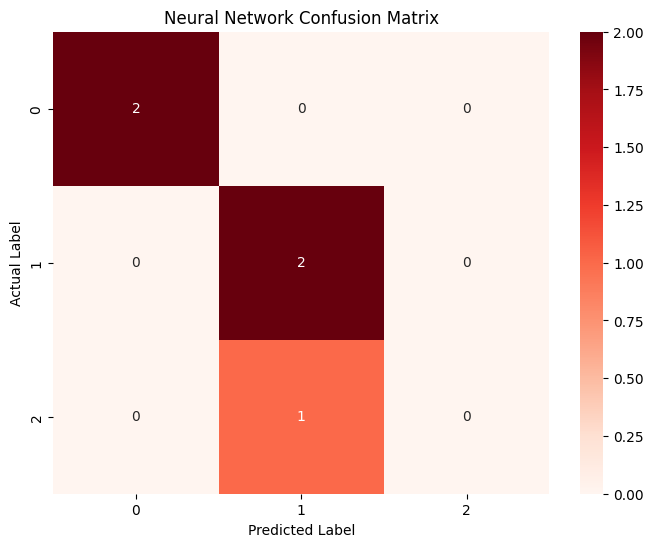

In [14]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_target), yticklabels=np.unique(y_target))
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tree, y_train)
y_pred_rf = rf_model.predict(X_test_tree)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Model Accuracy: 80.00%


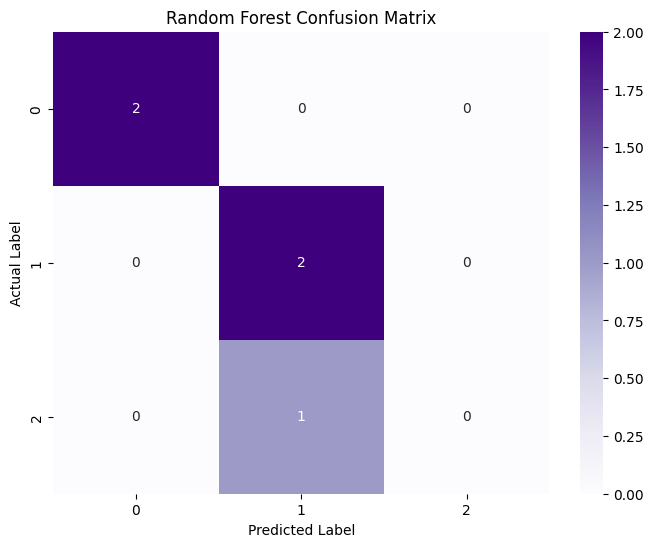

In [16]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=np.unique(y_target), yticklabels=np.unique(y_target))
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

XGBoost

In [17]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tree, y_train)
y_pred_xgb = xgb_model.predict(X_test_tree)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:09:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Accuracy: 100.00%


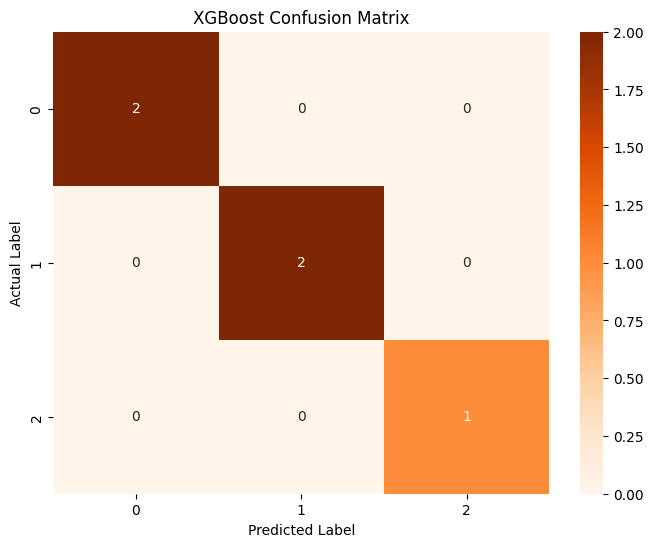

In [18]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y_target), yticklabels=np.unique(y_target))
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
